A class of lightweight deep convolutional neural networks

Low power, low resource consumption, useful for mobile devices

In [1]:
!pip uninstall tensorflow
!pip install tensorflow==2.1.0

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import numpy as np
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Uninstalling tensorflow-2.1.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.1.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.1.0
  Using cached https://files.pythonhosted.org/packages/85/d4/c0cd1057b331bc38b65478302114194bd8e1b9c2bbc06e300935c0e93d90/tensorflow-2.1.0-cp36-cp36m-manylinux2010_x86_64.whl


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [4]:
def prepare_image(file):
  """
  
  Next, we have a function called prepare_image() that accepts an image file, 
  and processes the image to get it in a format that the model expects. 
  We’ll be passing each of our images to this function before we use MobileNet to predict on it, 
  so let’s see what exactly this function is doing.
  
  """
  img_path = 'data/MobileNet-samples'
  img = image.load_img(img_path+file, target_size=(224,224))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array,axis=0)
  return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [5]:
# from IPython.display import Image
# Image(filename='data/MobileNet-samples/1.PNG', width=300,height=200) 

In [6]:
# preprocessed_image = prepare_image('1.PNG')
# predictions = mobile.predict(preprocessed_image)
# results = imagenet_utils.decode_predictions(predictions)
# results

In [7]:
# Image(filename='data/MobileNet-samples/2.PNG', width=300,height=200)

In [8]:
# preprocessed_image = prepare_image('2.PNG')
# predictions = mobile.predict(preprocessed_image)
# results = imagenet_utils.decode_predictions(predictions)
# results

In [9]:
# Image(filename='data/MobileNet-samples/3.PNG', width=300,height=200) 

In [10]:
# preprocessed_image = prepare_image('3.PNG')
# predictions = mobile.predict(preprocessed_image)
# results = imagenet_utils.decode_predictions(predictions)
# results

In [11]:
train_path = '/content/drive/MyDrive/sign_language_dataset/train'
valid_path = '/content/drive/MyDrive/sign_language_dataset/valid'
test_path = '/content/drive/MyDrive/sign_language_dataset/test'

In [12]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=valid_path,target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [13]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [14]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)

In [15]:
model = Model(inputs=mobile.input,outputs=output)

In [16]:
for layer in model.layers[:-23]:
  layer.trainable = False

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [18]:
# train the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=30,
          verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 172 steps, validate for 30 steps
Epoch 1/30
172/172 - 465s - loss: 0.8274 - accuracy: 0.7436 - val_loss: 1.0685 - val_accuracy: 0.6600
Epoch 2/30
172/172 - 7s - loss: 0.1188 - accuracy: 0.9854 - val_loss: 0.8172 - val_accuracy: 0.7400
Epoch 3/30
172/172 - 7s - loss: 0.0411 - accuracy: 0.9994 - val_loss: 0.7130 - val_accuracy: 0.7667
Epoch 4/30
172/172 - 7s - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.6471 - val_accuracy: 0.8100
Epoch 5/30
172/172 - 7s - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.5881 - val_accuracy: 0.8167
Epoch 6/30
172/172 - 7s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.5370 - val_accuracy: 0.8333
Epoch 7/30
172/172 - 7s - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.5202 - val_accuracy: 0.8233
Epoch 8/30
172/172 - 7s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.4989 - val_accuracy: 0.8433
Epoch 9/30
172/172 - 7s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.4794 - val_accuracy: 0.8400
Epoch

In [20]:
test_labels = test_batches.classes

In [21]:
predictions = model.predict(x=test_batches,verbose=0)

In [22]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [23]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 1 4 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 1 4 0 0 0 0]
 [0 0 0 0 1 0 4 0 0 0]
 [0 0 1 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


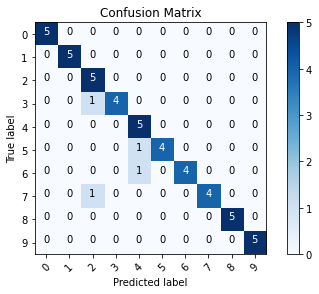

In [24]:
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')